# Working Paper: Who is Covered by Unemployment Insurance in China?
# Complementary Code File 2 for Appendix 2
# Tree-based Models (Bagging and Boosting)

This file complements Table A4.2

## 1. Packages & data

In [4]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import metrics
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# set seed for reproducability
np.random.seed(421)
random.seed(421)

0.6544398189618225


In [ ]:
# Working directory
os.chdir('working directory')


In [6]:
# Load Y
y_train = pd.read_csv('./broad_split/train_ybroad.csv')['coverage_broad']
y_test = pd.read_csv('./broad_split/test_ybroad.csv')['coverage_broad']
y_train.value_counts(), y_test.value_counts()

(coverage_broad
 0    4184
 1     299
 Name: count, dtype: int64,
 coverage_broad
 0    2790
 1     199
 Name: count, dtype: int64)

In [9]:
# get PD data with column names
colnames = pd.read_csv('./broad_split/colnames.csv', encoding='utf-8') # for feature extraction
x_train = pd.read_csv('./broad_split/x_trainMH.csv', header=None, encoding='utf-8', dtype=np.uint8) 
x_test = pd.read_csv('./broad_split/x_testMH.csv', header=None, encoding='utf-8', dtype=np.uint8)

# set colnames to Chinese characters
x_train.columns = colnames
x_test.columns = colnames

# check the dimensions of the data
print("Dimensions of x_train:", x_train.shape)
print("Dimensions of x_test:", x_test.shape)

Dimensions of x_train: (4483, 7627)
Dimensions of x_test: (2989, 7627)


In [10]:
# check dataset
x_train

,"(1, 必要条件)","(2, 数据安全)","(3, 创业项目)","(4, 8000)","(5, 这)","(6, 作)","(7, 促)","(8, 马鞍山)","(9, 年底)","(10, 经受)",...,"(7618, 迅速行动)","(7619, 每人)","(7620, 340.38)","(7621, 答)","(7622, 行政部门)","(7623, 重点)","(7624, 460)","(7625, 乡)","(7626, 报给)","(7627, 沙湾县)"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# load unlabelled predictors
x_unlabelled = pd.read_csv('./broad_split/df_unlabelledMH.csv', header=0, encoding='utf-8', dtype=np.uint8) 
x_unlabelled.columns = colnames
x_unlabelled

,"(1, 必要条件)","(2, 数据安全)","(3, 创业项目)","(4, 8000)","(5, 这)","(6, 作)","(7, 促)","(8, 马鞍山)","(9, 年底)","(10, 经受)",...,"(7618, 迅速行动)","(7619, 每人)","(7620, 340.38)","(7621, 答)","(7622, 行政部门)","(7623, 重点)","(7624, 460)","(7625, 乡)","(7626, 报给)","(7627, 沙湾县)"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Win
unemployment_unlabelled = pd.read_csv('unemployment_unlabelled_20250206.csv', header=0, encoding='utf-8')

Upsampling the training data to counter the imbalanced distribution of y.

In [15]:
# Select the minority class samples
minority_class_samples = x_train[y_train == 1]
# Extract samples from the x_trainMH dataset where the corresponding labels in the 'coverage_broad' column are equal to 1, representing the minority class.

# Extract the corresponding labels for the minority class samples.
minority_class_labels = y_train[y_train == 1]

# Upsample the minority class to match the majority class
X_upsampled, y_upsampled = resample(minority_class_samples, # upsample the minority class samples ...
                                    minority_class_labels, # ...and labels 
                                    replace=True, # sampling with replacement (so more than the original number of positive cases can be added)
                                    n_samples=x_train[y_train == 0].shape[0], # specifies the desired number of samples, which is set to the number of samples in the majority class.
                                    random_state=123) #  seed for reproducibility.

print('Number of class 1 examples after:', X_upsampled.shape[0])


Number of class 1 examples after: 4184


In [16]:
## Put dataframes together again
X_bal = np.vstack((x_train[y_train == 0], X_upsampled))
y_bal = np.hstack((y_train[y_train == 0], y_upsampled))
# Check the dimensions of the upsampled data
print("Dimensions of X_upsampled:", X_bal.shape)
print("Dimensions of y_upsampled:", y_bal.shape)

Dimensions of X_upsampled: (8368, 7627)
Dimensions of y_upsampled: (8368,)


In [17]:
# Check the distribution of class labels in y_upsampled
print("Distribution of class labels in y_upsampled:")
print(pd.Series(y_bal).value_counts())

Distribution of class labels in y_upsampled:
0    4184
1    4184
Name: count, dtype: int64


## 2. Bagging

Bagging (Bootstrap Aggregating) is a method of ensemble learning that repeatedly draws samples from the original training data. Bagging can help avoid over-fitting with high-dimensional data, but has a weakness in reducing bias. Therefore, it is best applied with a classifyer that has a low bias, such as a Decision Tree with uncut trees.

The configuration of the Decision Tree used for Bagging here is loosely oriented towards the defaults in the Rpart package. Maximum tree depth was set to None for the bagging application, and the minimum number of samples needed for a split have been adjusted more substantially to adjust for words that potentially only occur a few times but have high predictive power.

In [ ]:
# Loosely oriented to defaults in Rpart
tree_rp = DecisionTreeClassifier(criterion='gini', 
                                    min_samples_split=3, # Rpart default: minsplit = 20
                                    min_samples_leaf=1,
                                    max_depth=None, # Rpart default: maxdepth = 30
                                    ccp_alpha=0.005, # Rpart default: cp = 0.01
                                    random_state=1)

In [12]:
# Set up bagging
bagtree = BaggingClassifier(estimator=tree_rp,
                            #estimator=tree_rp,
                            n_estimators = 500,
                            max_samples = 1.0,
                            max_features = 1.0,
                            bootstrap = True,
                            bootstrap_features = False,
                            n_jobs = -1,
                            random_state = 1)

In [ ]:
# train the model
bag_model = bagtree.fit(X_bal, y_bal)

In [20]:
# predict
y_train_pred = bag_model.predict(X_bal)
y_test_pred = bag_model.predict(x_test)

In [21]:
# get the scores
bag_train = accuracy_score(y_true=y_bal, y_pred=y_train_pred)
bag_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('Bagging Tree Training/Test Accuracy %.3f/%.3f' % (bag_train, bag_test))

Bagging Tree Training/Test Accuracy 0.905/0.863


In [23]:
# Evaluate the model
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2790
           1       0.31      0.87      0.46       199

    accuracy                           0.86      2989
   macro avg       0.65      0.87      0.69      2989
weighted avg       0.94      0.86      0.89      2989



Text(113.9222222222222, 0.5, 'predicted label')

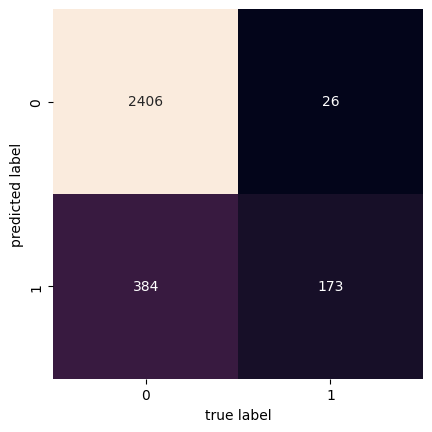

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

There are many false positives, which can be controlled with relatively little workload. By contrast, there are few false negatives, which would require substantial work to control.

In [31]:
# save model
import pickle
with open("BagTree_MH_A86_S87_20250206", 'wb') as file: pickle.dump(bag_model, file)

In [ ]:
# load model
with open("BagTree_MH_A86_S87_20250206", 'rb') as file: bag_model = pickle.load(file)

Predictions on the unlabelled data:

In [25]:
# Predict with Logistic Regression
unemployment_unlabelled['bag_label'] = bag_model.predict(x_unlabelled)
unemployment_unlabelled['bag_label'].value_counts()

bag_label
0    38542
1     9606
Name: count, dtype: int64

In [62]:
# save the dataframe
unemployment_unlabelled.to_csv('unemployment_unlabelled_20250206.csv', index=False)

## 3. Boosting

Adaptive Boosting uses an ensemble of weak classifiers, which is able to reduce both over-fitting and bias. As it consecutively draws new samples from the training data, it prioritizes learning on previously mis-classified observations. 

In [26]:
# very basic tree
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=1)

In [ ]:
# configure adaptive boosting 
ada = AdaBoostClassifier(estimator=tree,
                         n_estimators=500,
                         algorithm = 'SAMME',
                         learning_rate=0.8,
                         random_state=1)

In [ ]:
# fit the model
adab_model = ada.fit(X_bal, y_bal)

c:\Users\Paul\anaconda3\envs\ConPy310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


In [34]:
## predict on training and test data
y_bal_pred = adab_model.predict(X_bal)
y_test_pred = adab_model.predict(x_test)

In [35]:
## get the accuracy scores
adab_train = accuracy_score(y_true=y_bal, y_pred=y_bal_pred)
adab_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

## print the results
print('AdaBoost Training/Test-ACC %.3f/%.3f' % (adab_train, adab_test))

AdaBoost Training/Test-ACC 0.901/0.946


In [ ]:
# Classification report
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2790
           1       0.57      0.79      0.66       199

    accuracy                           0.95      2989
   macro avg       0.78      0.87      0.82      2989
weighted avg       0.96      0.95      0.95      2989



Text(113.9222222222222, 0.5, 'predicted label')

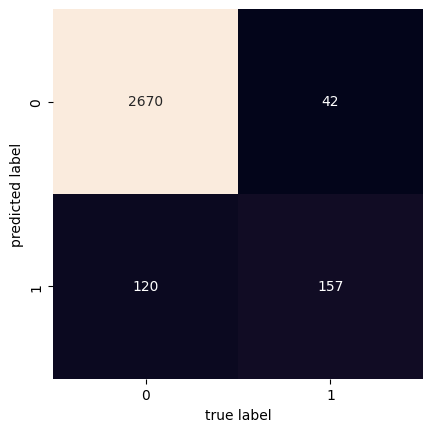

In [37]:
# confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
sns.heatmap(conf_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [47]:
# save model
import pickle
with open("BoostTree_MH_95_79_LR08", 'wb') as file: pickle.dump(adab_model, file)

In [ ]:
# load model
with open("BoostTree_MH_95_79_LR08", 'rb') as file: adab_model = pickle.load(file)

In [38]:
# Predict on unlabelled data
unemployment_unlabelled['adaboost_label'] = adab_model.predict(x_unlabelled)

In [55]:
# inspect labels
unemployment_unlabelled['adaboost_label'].value_counts()

adaboost_label
0    43280
1     4868
Name: count, dtype: int64

In [56]:
# save the dataframe
unemployment_unlabelled.to_csv('unemployment_unlabelled_20250206.csv', index=False)